<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center><b>Bachelor of Ecole Polytechnique</b></center>
<center>MAA106: Introduction to Numerical Analysis, year 1, semester 2</center>
<center>Maxime Breden</center>
<br>
<center><i>Based on Notebooks created by Aline Lefebvre-Lepot</i></center>

# Introduction to Computational Mathematics


&nbsp;

<img src="./figures/ApproxPi.png" alt="Pi" style="width: 570px;"/>

&nbsp;

<div markdown=1 class="Abstract">

In this chapter, we introduce the fundamental notion of **approximation**, which is the basis of Computational Mathematics. Approximation induces errors that have to be controlled. We focus on two kinds of errors: **round-off errors** due to machine representation of numbers and **truncation errors** due to mathematical approximation. Through examples, we show that mathematical analysis allows to study the behavior of errors and we introduce the notions of **convergence** and **speed of convergence**.


### Table of contents

- [Introduction](#intro)
- [Machine representation of numbers: round-off error](#RoundOff)
- [Mathematical approximations: truncation error](#trunc)
- [Total numerical error](#total)

In [4]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)

<a id="intro"></a>
## Introduction

Computers are essential to simulate and model complex phenomena in many domains such as physics, biology, economy... Several steps have to be fulfilled to go from the original phenomenon to the simulation result:
- Understand the original phenomenon: physics, economy, biology...
- Write a mathematical model: equations, differential equations, integrals, probabilities...
- Analyze the mathematical model: Is there a solution ? How does it behave ? What are its properties ? Are there analytical solutions ?
- Design a numerical method: find a method and an algorithm to approximate the solutions to the mathematical model.
- Analyze the numerical method: Does it give precise approximations ? How precise are they ?
- Implement the numerical method on a computer.
- Visualize and analyze the numerical results.

Most of these steps require approximations: 

- the original phenomenon is approximated by the mathematical model,
- the mathematical model is approximated by the numerical method,
- the numerical method's result is approximated by the computer.

To be confident in the results obtained by computer simulations, we would like to be able to say how precise the approximation is at each of these steps: it is essential to evaluate the corresponding error (for example, providing margins of error). Note that, even if one wants the results to be precise, it is also necessary to design efficient numerical methods, to compute these results in a reasonable time.

**Computational mathematics** is the domain of mathematics which aims at designing precise and efficient numerical methods, in order to approximate solutions to a given mathematical problem. For the same problem, various numerical methods and algorithms can be proposed. A great part of the research in computational mathematics is devoted to estimate the error behavior induced by the numerical models, in order to be able to compare the different algorithms. 

Before going further, we recall the definition of the absolute and relative error which are used to evaluate the precision of a given approximation. 


<div  markdown=1 class="Def">
If $x$ is an approximation of $x^*$,   

- the **absolute error** between $x$ and $x^*$ is $\left|\,x-x^*\right|$.
- the **relative error** between $x$ and $x^*$ is $\displaystyle\frac{\left|\,x-x^*\right|}{|\,x^*\,|}$.

where $|\,x\,|$ is the absolute value of $x$.

The relative error can be expressed in term of percentage.

<div markdown=1 class="Ex">
Approximation of $\pi$:

| Approximation    |    Absolute error   |Relative error| Relative error in $\%$| 
|:-----------:|:-----------------:|:---------:|:---------:|
| $x=22/7$  |  $1.26\times10^{-3}$ |  $4.02\times 10^{-4}$| $4.02\times 10^{-2}\%$ |
| $x=3.1416$  |  $7.35\times10^{-6}$ |  $2.34\times 10^{-6}$ | $2.34\times 10^{-4}\%$ |


- If $x$ approximates $\pi$ with **absolute error** at most $10^{-3}$, it must belong to the interval $$[\pi-10^{-3},\pi+10^{-3}] \approx [3.1406, 3.1426].$$
- If $x$ approximates $\pi$ with **relative error** at most $10^{-3}$, it must belong to the interval $$[\pi(1-10^{-3}),\pi(1+10^{-3})] \approx [3.1385, 3.1447].$$

<div markdown=1 class="Rmk">
The same relative error can occur for widely varying absolute errors :

| Value to be estimated| &nbsp;&nbsp; Approximation &nbsp;&nbsp;| Absolute error|Relative error|
|:--------------------:|:-----------------------:|:------------------:|:----------------:|
| $x^*=1\times 10^1$     | $x=1.1\times 10^1$    |$1\times 10^{-1}$   |$1\times 10^{-1}$ |
| $x^*=1\times 10^{-3} $ | $x=1.1\times 10^{-3}$ | $1.1\times 10^{-4}$|$1\times 10^{-1}$ |
| $x^*=1\times 10^4 $    | $x=1.1\times 10^4$    | $1.1\times 10^{3}$ |$1\times 10^{-1}$ |

The relative error is often more meaningful as a measure of accuracy.

<a id="RoundOff"></a>
## Machine representation of numbers: round-off error

<img src="figures/Zuse_z3.jpg" alt="Zuse" style="width: 300px;"/>
  
>**Konrad Zuse (1910-1995) and the Z3-computer.**
>The Z3-computer is said to be the first programmable computer. It was designed by Konrad Zuse, and built in 1941. It is based on binary floating-point numbers, is programmable with loops, has a memory and a computation unit. It is often referred to as the ancestor of today's computers. 

The arithmetic performed by a computer is different from the arithmetic you use in your theoretical courses. The reason for that is that in the computational world, **the represented numbers can only have a fixed, finite number of digits**.

As a consequence, numbers such as $\pi$ or $\sqrt{2}$ cannot be represented exactly and are approximated. Then, for example, $(\sqrt{2})^2$ will not be exactly equal to $2$. 

In [11]:
## sqrt(2)^2 is not equal to 2

a = (sqrt(2))**2
print('sqrt(2)^2 =', a)

sqrt(2)^2 = 2.0000000000000004


Most of the time, the results of the computer calculations are sufficiently precise and such small errors do not really matter.

However, that is not always true. The user has to keep in mind that real numbers are approximated and to be aware of the possible problems that it can produce:
- Computers have limited magnitude and precision to represent numbers,
- Some arithmetical manipulations are highly sensitive to this approximated representation.

### Machine representation of numbers

Before presenting the number representation in computers, let us first recall what a *number system* is. 

<div  markdown=1 class="Ex"> 

The system we are most familiar with is the *decimal* system (or the *base-10* system). In this system, the numbers are decomposed in sums of powers of $10$:

$$
[6743.7]_{10} = 6\times 10^3 + 7\times 10^2 +4\times 10^1 + 3\times 10^0 + 7\times 10^{-1}
$$


<div  markdown=1 class="Ex"> 

Computers use the *binary* system (or *base-2* system) to represent numbers:

$$
[1011.1]_{2} = 1\times 2^3 + 0\times 2^2 +1\times 2^1 + 1\times 2^0 + 1\times 2^{-1} \quad(= [11.5]_{10})
$$

More generally, one can define a number system for any base $\beta$.

<div  markdown=1 class="Def">

**Base-$\beta$ number system. Positional representation.**

For any integer $\beta\geq 2$, the *positional representation* $x_\beta$ of a real $x$ with a finite number of digits is

$$
x_\beta = (-1)^s [x_q\,x_{q-1}\ldots x_1\,x_0\, . \, x_{-1}x_{-2}\ldots x_{-p}]_\beta,
$$
with
$$ s\in\{0,1 \},\quad{} 0\leq x_k<\beta \quad{} \text{ for }\quad{} k=-p,\ldots, q, \quad{}\text{ and }\quad{} x_q\neq 0.
$$

This representation stands for the number
$$
x = (-1)^s\sum_{k=-p}^q x_k \beta^k.
$$

A fractional number can have a finite number of digits in a base and an infinite number of digits in another base. 

<div  markdown=1 class="Ex"> The fraction $x=1/3$ has infinite digits in base $10$: $x_{10}=[0.333\ldots]_{10}$, which means 

$$
x_{10} = \sum_{k=-\infty}^{-1}3 \times 10^{k},
$$

while it has only one digit in base $3$ : $x_3=[0.1]_3$

To represent numbers in computers, an exponent representation of reals is used. For example, we can write in base $10$

$$
x=-47.258 = (-1)^1 \times 0.47258 \times 10^2.
$$

It can be represented by storing the 4 following values
- the **sign** : $s_a=1$
- the **mantissa** :  $a=47258$
- the **sign of the exponent** :  $s_b=0$ 
- the **exponent** : $b=2$ 

So that 
$$
x=(-1)^{s_a} \times [0.a]_{10} \times 10^{(-1)^{s_b}\ [b]_{10}}.
$$

Note that we could also have written

$$
- 47.258 = (-1)^1 \times 0.0047258 \times 10^4
$$

which would have given $s_a=1$, $a=0047258$, $s_b=0$ and $b=4$, . 

To ensure uniqueness, the representation is normalized by imposing that the first digit of $a$ is different from $0$. We say that all the digits of $a$ are **significant**.

<div  markdown=1 class="Def">

**Normalized exponent representation.**

Let $\beta>0$ be a given basis and $x$ a real. Then, $x$ can be written as

$$
x=(-1)^{s_a} \times [0.a]_{\beta} \times \beta^{(-1)^{s_b}\ [b]_\beta}
$$

where the first digit of $a$ is different from $0$, and $b$ is an integer. If we impose that, if $a$ has infinitely many digits then infinitely many of them must be different from $\beta -1$, this representation is unique and is called the *normalized exponent representation* of $x$ in base $\beta$.


<div  markdown=1 class="Fur"> 

In base 10, we can for instance write $0.2$ as

$$
[0.2]_{10} \times 10^0,
$$

or as

$$
[0.19999\ldots]_{10} \times 10^0,
$$

since

\begin{align}
[0.19999\ldots]_{10} &= 10^{-1} + \sum_{k=-\infty}^{-2} 9\times 10^{k} \\
&= 10^{-1} +  9\sum_{k=2}^{\infty} 10^{-k} \\
&= 10^{-1} +  9 \frac{10^{-2}}{1-10^{-1}} \\
&= 2 \times 10^{-1}.
\end{align}

However, $[0.19999\ldots]_{10}$ does not satisfy the additional requirement that infinitely many of its digits are different from $\beta-1 = 9$. One can show that $[0.2]_{10} \times 10^0$ is indeed the unique *normalized exponent representation* of $0.2$ in base $10$.


One wants to use this normalized exponent representation to represent real numbers in computers, by storing the list $(s_a,a,s_b,b)$. However, computers can only use a fixed number $N$ (called the *word length*) of memory slots to store a number. Two slots are used to store the signs $s_b$, $s_a$, which leaves $N-2$ slots for the mantissa $a$ and the exponent $b$. In practice, the number of slots available for the exponent and the mantissa are fixed by default. If we call them respectively $m$ and $n$, we have $N=m+n+2$. Due to this length restriction, only a finite set of real numbers can be represented: the so-called **machine numbers**.

<div  markdown=1 class="Def">

**Machine numbers.**

Let $m$ and $n$ be given integers and $\beta>0$ be a given basis. A *machine number* for the couple $(m,n)$ and the base $\beta$ is a real number $x$ having following normalized exponent representation in base $\beta$

$$
x=(-1)^{s_a} \times [0.a]_{\beta} \times \beta^{(-1)^{s_b}\ [b]_\beta}
$$

with the length of $a$ and $b$ respectively lower than $m$ and $n$.

It can be exactly represented by the following word of size $N=m+n+2$:
 
$$|\quad{} s_a \quad{}|\quad{} a \quad{}|\quad{} s_b\quad{}|\quad{} b \quad{}|$$.

<div  markdown=1 class="Rmk">

In several examples in the rest of these notes, we work with machine numbers for the base $\beta=10$ because that is the basis we are the most familiar with, and relatively small numbers $m$ and $n$ in order to simplify the computations. However, in practice most of nowadays computers use a standard called *double precision*, which almost corresponds to the machine numbers defined as above with $\beta=2$, $m=52$ and $n=10$. There are some small differences between our description of machine numbers and what actually happens on a computer, but the general principles remain the same.

<div  markdown=1 class="Ex"> For $\beta=10$, $m=5$, $n=2$

- The number $x=-47.258=-0.47258\times 10^2$ is represented by the word of length $N=9$ 

$$|\quad{} 1 \quad{}|\quad{} 47258 \quad{}|\quad{} 0 \quad{}|\quad{} 02\quad{}|$$

- The number $x=0.0836=0.836\times 10^{-1}$ is represented by the word of length $N=9$ 

$$|\quad{} 0 \quad{}|\quad{} 83600 \quad{}|\quad{} 1 \quad{}|\quad{} 01\quad{}|$$

As already stated, the set $A$ of numbers which are representable in a given machine is finite and most of the real numbers cannot be exactly represented. These real numbers have to be approximated by a machine number contained in $A$. It is natural to suppose that a real $x\notin A$ should be approximated by $rd(x)\in A$ where $rd(x)$ is the best approximation of $x$ by an element of $A$. Such an approximation can be achieved by **rounding** and is called the floating-point representation of $x$.  

<div  markdown=1 class="Def"> 

**Floating-point representation and round-off error (also called rounding error).**

Let $n$, $m$ and $\beta$ be given and denote by $A$ the corresponding set of machine numbers. Consider a real $x\notin A$. Its *floating-point representation* $rd(x)$ is the best approximation of $x$ by an element of $A$:

$$
rd(x)\in A, \quad{} \text{ and } \quad{} \forall~y\in A, \,\,|x-rd(x)|\leq|x-y|.
$$

The error produced replacing a number $x$ by its floating-point representation $rd(x)$ is called the **round-off error**.

<div  markdown=1 class="Ex"> For $\beta=10$, $m=5$, $n=2$, the number $\pi=3.14159265\ldots$ can be written in the decimal normalized representation as 

$$\pi=0.314159265\ldots\times 10^1.$$

Since $m=5$, the decimal machine number approximating $\pi$ is

$$rd(\pi)=0.31416\times 10^1=3.1416,$$

and $\pi$ is represented by the word of length $N=9$ 

$$|\quad{} 0 \quad{}|\quad{} 31416 \quad{}|\quad{} 0 \quad{}|\quad{} 01
\quad{}|.$$

The corresponding relative round-off error is

$$
\left|\frac{\pi-rd(\pi)}{\pi}\right| \approx 2.34\times 10^{-6}.
$$

<div markdown=1 class='Fur'> There are a few cases where the best approximation by an element of $A$ is not unique. For instance, for $\beta=10$, $m=5$, $n=2$, the number $x=0.192835$ is not a machine number, and the two machines numbers that are the closest to $x$ are 

$$
x_- =0.19283 \quad{} \text{and}\quad{} x_+ =0.19284.
$$

They are exactly at the same distance from $x$. Therefore we have

$$
\forall~y\in A, \,\,|x-x_-|\leq|x-y| \quad{}\text{and}\quad{} \forall~y\in A, \,\,|x-x_+|\leq|x-y|.
$$

One must choose a convention to break the tie in such cases. The usual convention that is used is that of *rounding to nearest even*: we keep the machine number whose last digit is even. In our example, we would therefore take $rd(x) = 0.19284$.

Suppose we are working with the decimal representations of real numbers and that the number of digits $m$ for the mantissa is given. If the normalized exponent representation of $x$ is

$$x=0.a_1a_2...a_m a_{m+1}... \times 10^n,$$

then, its floating-point representation is

$$rd(x)=0.a_1a_2...\tilde a_m \times 10^n,$$

where $\tilde a_m=a_m$ if $a_{m+1}<5$ and $\tilde a_m=a_m+1$ if $a_{m+1}> 5$. If $a_{m+1}=5$, one must look at the following digits, and then maybe use a tie-breaking rule such as the one presented in the above remark.

The corresponding relative round-off error is

\begin{align}
\left|\frac{x-rd(x)}{x}\right|&=\left|\frac{(0.a_1a_2...a_m a_{m+1}...\ -\ 0.a_1a_2...\tilde a_m)\times 10^n}{0.a_1a_2...a_m a_{m+1}...\times 10^n}\right|\\
&=\left|\frac{(a_m . a_{m+1}...\ -\ \tilde a_m)\times 10^{n-m}}{0.a_1a_2...a_m a_{m+1}...\times 10^n}\right| \\
&=\left|\frac{a_m . a_{m+1}...\ -\ \tilde a_m}{0.a_1a_2...a_m a_{m+1}...}\right|\times 10^{-m}.
\end{align}

Since $a_1\neq 0$, the denominator is greater than $0.1$ and the rounding procedure ensures that the numerator is lower than $0.5$, which gives

$$
\left|\frac{x-rd(x)}{x}\right| \leq \frac{0.5}{0.1}\times 10^{-m} = 5 \times 10^{-m}.
$$

This means that, for any non zero $x$ in $\mathbb{R}$, the relative error between $x$ and its floating-point approximation $rd(x)$ is bounded by $\varepsilon=5 \times 10^{-m}$. Equivalently, we have the following result:

$$
\forall~x\in \mathbb{R},\quad{}\exists \alpha\in \mathbb{R} , |\alpha|\le \varepsilon, \quad{} \text{such that}\quad{} rd(x) \,=\, (1-\alpha)\, x .
$$


<div  markdown=1 class="Def">

**Machine precision.**

Consider the floating-point representation for the couple $(m,n)$ and base $\beta$. The *machine precision* $\varepsilon$ is the smallest positive real such that

$$
\forall~x\in \mathbb{R},\quad{}\exists \alpha\in \mathbb{R} , |\alpha|\le \varepsilon, \quad{} \text{such that}\quad{} rd(x) \,=\, (1-\alpha)\, x .
$$

<div mardown=1 class='Rmk'>

In case of decimal representation, one has $\varepsilon=5 \times 10^{-m}$.

In case of the double precision, which is the binary format typically used on computers and already mentioned previously, $\varepsilon= 2^{-52} \approx 10^{-16}$.

<div  markdown=1 class="Ex"> The fact that $\varepsilon \approx 10^{-16}$ in double precision means that, on a usual computer, we roughly get 16 digits of accuracy in base 10. Indeed, you can check below that, if you try to define $x=0.1111111111111111$ (with 16 ones), and $y=0.11111111111111111$ (with 17 ones), you in fact get the same floating point number, but that is not the case if you compare $x$ with $z=0.111111111111111$ (with 15 ones).

In [30]:
x = 0.1111111111111111  # 16 ones
y = 0.11111111111111111 # 17 ones
print('Is x equal to y?', x==y)

z = 0.111111111111111   # 15 ones
print('Is x equal to z?', x==z)

Is x equal to y? True
Is x equal to z? False


<div markdown=1 class='Fur'> 

To be fully precise, one should add an extra condition in the definition of machine precision. Indeed, since the set $A$ of all machine numbers for a given $(m,n)$ and $\beta$ is finite, there is a *largest* machine number, which is given by

\begin{align}
A_{max} = [0.\underbrace{(\beta-1)\ldots(\beta-1)}_{m\text{ times}}]_\beta \times \beta^{[\overbrace{(\beta-1)\ldots(\beta-1)}^{n\text{ times}}]_\beta}.
\end{align}

Therefore, when $x\to\infty$, $rd(x)$ stays bounded and the relative rounding error goes to $1$. Similarly, there is a *smallest positive* machine number, which is given by

\begin{align}
A_{min} = [0.1\underbrace{0\ldots0}_{m-1\text{ times}}]_\beta \times \beta^{-[\overbrace{(\beta-1)\ldots(\beta-1)}^{n\text{ times}}]_\beta}.
\end{align}

Therefore, when $x$ is too small the relative rounding error is equal to $1$.

The correct definition of the *machine precision* $\varepsilon$ is the smallest positive real such that

$$
\forall~x\in\mathbb{R} \text{ such that } A_{min}\leq \vert x\vert \leq A_{max},\quad{}\exists \alpha\in \mathbb{R} , |\alpha|\le \varepsilon, \quad{} \text{such that}\quad{} rd(x) \,=\, (1-\alpha)\, x.
$$

With the usual *double precision* format, these limitations are rarely encountered. Indeed, in that case $A_{max}\approx 10^{308}$ and $A_{min}\approx 10^{-323}$ (in practice, extra machine numbers called *subnormal* are added close to $0$, which is why the exponents of $A_{max}$ and $A_{min}$ are not symmetric). Besides, when ones tries to store a number which is larger than $A_{max}$, the computer actually stores it as a special number denoted **Inf**.

In [1]:
#Some eperiments with very small and very large numbers
x1 = 1.0e-323
print(x1)
x2 = 1.0e-324
print(x2)
x3 = 1.0e308
print(x3)
x4 = 1.0e309
print(x4)

1e-323
0.0
1e+308
inf


### Floating-point arithmetic

The result of arithmetic operations (addition, subtraction...) needs not be a machine number, even if the operands are. Therefore, arithmetic operations can not be achieved exactly on computers and finite-digit operations have to be defined. Let us denote by $\oplus$, $\ominus$, $\otimes$ and $\oslash$ the finite digit operators corresponding to the addition, subtraction, multiplication and division respectively. The floating-point (or finite-digit) arithmetic is given by

\begin{align}
x \oplus y = rd(\, rd(x) + rd(y)\,), &\quad\quad\quad x \ominus y = rd(\, rd(x) - rd(y)\,) \\
x \otimes y = rd(\, rd(x) \times rd(y)\,), &\quad\quad\quad x \oslash y = rd(\, rd(x)\,\, / \,\,rd(y)\,) 
\end{align}


<div  markdown=1 class="Ex"> 
For $\beta=10$, $m=5$, $n=2$, let us consider $x=1/3$ and $y=6/7$. We have

\begin{align}
rd\left(\frac{1}{3}\right)&=rd(0.3333333\ldots \times 10^0)=0.33333\times 10^0\\
rd\left(\frac{6}{7}\right)&=rd(0.85714285714285\ldots \times 10^0)=0.85714\times 10^0
\end{align}

and

\begin{align}
\frac{1}{3} \oplus \frac{6}{7} 
&= rd( 0.33333\times 10^0 + 0.85714\times 10^0) \\
&= rd(1.19047\times 10^0) \\
&= rd( 0.119047 \times 10^1) \\
&= 0.11905 \times 10^1
\end{align}

while the exact value is 

$$
\frac{1}{3} + \frac{6}{7} = 0.119047619047619\ldots\times 10^1.
$$

The absolute error is about $2\times 10^{-5}$. The relative error is also about $2\times 10^{-5}$, which is of the same order of magnitude than the machine precision for $m=5$.

Most of the time, the results obtained using finite-digit arithmetic are sufficiently accurate for the usage we have in mind. However, any computer user has to be aware of some (possibly) problematic consequences of these finite digit computations. The two most common of them are illustrated in the following examples.

<div  markdown=1 class="Ex"> 

**Addition of a large and a small number: large absolute error.**

For $\beta=10$, $m=5$, $n=2$, let us consider $x=1/3$ and $y=6/7 \times 10^4$. We have

\begin{align}
rd\left(\frac{1}{3}\right)&=rd(0.3333333\ldots \times 10^0)=0.33333\times 10^0\\
rd\left(\frac{6}{7}\times 10^4\right)&=rd(0.85714285714285\ldots \times 10^4)=0.85714\times 10^4
\end{align}

and

\begin{align}
\frac{1}{3} \oplus \left(\frac{6}{7}\times 10^4\right) 
&= rd( 0.33333\times 10^0 + 0.85714\times 10^4) \\
&= rd(8571.73333) \\
&= rd( 0.857173333 \times 10^4)\\
&= 0.85717\times 10^4 \\
&= 8571.7
\end{align}

while the exact value is 

$$
\frac{1}{3} + \frac{6}{7}\times 10^4 = 8571.761904761905\ldots.
$$

The relative error is about $7.22\times 10^{-6}$ but **the absolute error is about $0.062$**, which is not so small compared to $x$ itself.

<div  markdown=1 class="Ex"> 

**Subtraction of nearly equal numbers: large relative error.**

For $\beta=10$, $n=2$, $m=5$, let us consider $x=0.34523$ and $y=0.3451162368$. We have

\begin{align}
rd\left(x\right)&=0.34523\\
rd\left(y\right)&=0.34512
\end{align}

and

\begin{align}
x \ominus y 
&= rd( 0.34523 - 0.34512) \\
&= rd(0.00011) \\
&= 0.11\times 10^{-3}
\end{align}

while the exact value is 

$$
x-y = 0.1137632\times 10^{-3}.
$$

The absolute error is $0.37632\times 10^{-5}$, but **the relative error is about $0.033$ which is much greater than the machine precision for $m=5$.**


The following Python code illustrates this behavior with the computer precision. Suppose that you want to compute $$s=x-y$$ for

\begin{align}
x&=1+10^{-15}\\
y&=1
\end{align}
The exact result is of course $s=10^{-15}$

In [2]:
## subtraction of two nearly equal numbers

x = 1 + 1e-15
y = 1
numerical_result = x - y
exact_result = 1e-15
absolute_error = abs(numerical_result - exact_result)
relative_error = absolute_error/exact_result
print('absolute error =', absolute_error, '\nrelative error =', relative_error)

absolute error = 1.1022302462515646e-16 
relative error = 0.11022302462515646


Even for high (but finite) computer precision, the subtraction of two nearly equal numbers can
lead to a relative error of 11% !

An additional problem that arises when one subtracts nearly equal numbers is the **cancellation of significant digits**.  In the previous example with $x=0.34523$ and $y=0.3451162368$, even though $m=5$, $x \ominus y $ only has two significant digits. Indeed, three digits have been canceled due to the fact that the first three significant digits of $x$ and $y$ are equal. This means that, even though $x \ominus y= 0.11000\times 10^{-3}$ with $m=5$, the last three $0$ digits are meaningless: they do not necessarily correspond to the digits that should be in the exact value of $x-y$. All the following computations involving $x-y$ will therefore be carried out using these three non-significant digits, leading to results with at most two significant digits, even if $m=5$...

Similarly, when one adds two numbers having different orders of magnitude, like $x=1/3$ and $y=6/7 \times 10^4$ as in one of the above examples, we also lose some information on the smaller number. Indeed, as we saw when we computed $x\oplus y$ with $m=5$ in that example, only the first $3$ in $x=0.3333\ldots$ plays a role, and the final machine number $x\oplus y$ would have been the same even if the next digits of $x$ were changed. 

Being aware of such behaviors, the user can avoid the loss of accuracy due to round-off errors by taking care of the order of the different operations, or by reformulating the problem. 

<div markdown=1 class='Ex'>

**Modifying the order of operations to increase accuracy**

For $\beta=10$, $m=5$, $n=2$, let us again consider $x=1/3$ and $y=6/7 \times 10^4$. We want to compute

$$s=x+y-y.$$

The exact result is of course $s=x=1/3$. Let's compare this exact result with the numbers obtained for

$$
s_1 = (x \oplus y) \ominus y \quad{}\text{and}\quad{} s_2 = x \oplus (y\ominus y).
$$

For $s_1$, we first have as above $(x \oplus y) = 0.85717\times 10^5$, and then we have to subtract two nearly equal numbers

\begin{align}
s_1 &= rd\left((x \oplus y) - rd(y) \right) \\
&= rd\left(0.85717\times 10^4 - 0.85714\times 10^4 \right) \\
&= 0.3
\end{align} 

Again, the relative error with respect to $s=1/3$ is quite large: $10\%$ for such a simple computation. On the other hand, if we order the operations differently, since $rd\left( rd(y) - rd(y) \right)=0$, we get

\begin{align}
s_2 &= rd\left(rd(x) + (y\ominus y) \right) \\
&= rd\left(0.33333\ldots\times 10^0 + 0\right) \\
&= 0.33333
\end{align} 

This time, the relative error is of the order of machine precision, so it is as small as we can expect it to be. 

<div markdown=1 class='Rmk'>
The above example shows (when replacing $x+y-y$ by $x+y+(-y)$), that the finite-digit addition is not associative! 

**Reformulation of the problem to increase accuracy**

Let us look at another example. Suppose you want to compute the roots $(x_1,x_2)$ of the quadratic polynomial

$$
ax^2+bx+c=0,
$$

where

\begin{align}
a&=1\\
b&=-10^8- 10^{-8}\\
c&=1
\end{align}

The exact roots are given by $x_1= 10^{8}$ and $x_2=10^{-8}$. Indeed

$$
(x-x_1)(x-x_2) = x^2 -(x_1+x_2)x + x_1x_2,
$$

and the proposed values of $x_1$ and $x_2$ satisfy $-(x_1+x_2) = b$ and $x_1x_2=c$. 

However, if one is not able to *guess* the values of $x_1$ and $x_2$ a priori, one would typically compute them using the classical formula for quadratic polynomials:

\begin{align}
x_1&=\frac{-b+\sqrt{b^2-4ac}}{2a}\\
x_2&=\frac{-b-\sqrt{b^2-4ac}}{2a}
\end{align}

The following program computes $x_1$ and $x_2$ from these formula:

In [5]:
## roots of a quadratic polynomial, classical formulation

x1 = 1e8
x2 = 1e-8
a = 1
b = -(x1+x2)
c = x1*x2
x1num = (-b + sqrt(b**2 - 4*a*c))/(2*a)
x2num = (-b - sqrt(b**2 - 4*a*c))/(2*a)
err1_rel = abs(x1-x1num)/x1
err2_rel = abs(x2-x2num)/x2
print('x1 = ', x1num, '[exact value: ',x1 ,', relative error: ', 100*err1_rel, '%]')
print('x2 = ', x2num, '[exact value = ',x2 ,' relative error = ', 100*err2_rel, '%]')

x1 =  100000000.0 [exact value:  100000000.0 , relative error:  0.0 %]
x2 =  1.4901161193847656e-08 [exact value =  1e-08  relative error =  49.011611938476555 %]


The obtained value for $x_1$ looks fine, but for $x_2$ the relative error is huge... 

This is again caused by cancellation errors occurring when we subtract two very close numbers. Indeed, $b^2 = 10^{16}$ while $4ac = 4$, therefore $\sqrt{b^2-4ac}\approx 10^8$ and the term $-b-\sqrt{b^2-4ac}\approx 10^8 - 10^8$ appearing in $x_2$ is problematic.

A method to avoid this loss of accuracy is to compute the "nice" root (in our case $x_1$, it depends on the sign of $b$) using the previous formula, and then use the equality $c=x_1x_2$ to compute the second one: 

\begin{align}
\tilde x_1&=\frac{-b+sign(b)\sqrt{b^2-4ac}}{2a}\\
\tilde x_2&=\frac{c}{x_1}
\end{align}

In [6]:
## roots of a quadratic polynomial, accurate formulation when b>>4ac

x1 = 1e8
x2 = 1e-8
a = 1
b = -(x1+x2)
c = x1*x2
x1num = (-b + sqrt(b**2 - 4*a*c))/(2*a)
x2num = c/x1
err1_rel = abs(x1-x1num)/x1
err2_rel = abs(x2-x2num)/x2
print('x1 = ', x1num, '[exact value: ',x1 ,', relative error: ', 100*err1_rel, '%]')
print('x2 = ', x2num, '[exact value = ',x2 ,' relative error = ', 100*err2_rel, '%]')

x1 =  100000000.0 [exact value:  100000000.0 , relative error:  0.0 %]
x2 =  1e-08 [exact value =  1e-08  relative error =  0.0 %]


This new computation is now accurate up to machine precision for both roots.

<a id="trunc"></a>
## Mathematical approximations: truncation error

The previous section presented one of the sources of errors (round-off errors) appearing when one tries to solve a problem numerically. All the algorithms proposed were supposed to give the exact solution to the problem if performed using exact arithmetic. However, for as soon as the problems to be solved become more complicated, there is usually no algorithm that allows to get the exact solution. In that case, one has to design algorithms capable of approximating the solution. One of the main challenges in that case is to obtain algorithms giving "good" approximations, that is with "small" truncation errors. Before going further, let us define what an algorithm is in the context of this course.

<div  markdown=1 class="Def">

**Algorithm.**

An algorithm is a set of directives specifying how to solve (or approximate the solution to) a given problem. It must have the feature of terminating after a finite number of elementary operations.

The inputs of the algorithm are given at its beginning. Some of the inputs are given by the problem you want to solve. There can also be other inputs, called **discretization parameters**, which are related to the numerical method chosen to approximate the problem. 

For example, the procedures described in the above section to compute $s=x+y-y$ or the roots of quadratic polynomials are algorithms. The two procedures to compute $s$ can be described as:

<div  markdown=1 class="Algo">

**Algorithms to compute $s=x+y-y$.**

Algorithm 1:
\begin{align*}
INPUT:&\quad{} x,y\\
DO:&\quad{} s=x+y\\
&\quad{} s=s-y\\
RETURN:&\quad{} s\\
\end{align*}

Algorithm 2:
\begin{align*}
INPUT:&\quad{} x,y\\
DO:&\quad{} s=y-y\\
&\quad{} s=x+s\\
RETURN:&\quad{} s\\
\end{align*}

These two algorithms are exacts: if performed using exact arithmetic, they do return the exact value $s$. The inputs $x$ and $y$ are given by the problem and no discretization parameter is needed.

Suppose now that you want to compute $x^*$ solution to a given problem that cannot be exactly computed using elementary operations. In that case, one can use an approximation of $x^*$, depending on a discretization parameter. For example, suppose you want to compute $x^*=f'(a)$, $f$ being a derivable function and $a$ a given real number.

Several approximations of $f'(a)$ can be suggested by recalling that the derivative of $f$ in $a$ is the slope of the tangent to the graph of $f$ at point $a$. This slope can be approximated by the slope of secants to the graph of $f$ passing through two points of the graph close to the point $(a,f(a))$.

<img src="./figures/ApproxDer.png" alt="ApproxDer" style="width: 450px;"/>

The above picture suggests that $x^*=f'(a)$ can be approximated for small $h$ by the formula

$$
x_h = \frac{f(a+h)-f(a)}{h},
$$

or by

$$
\bar x_h = \frac{f(a+h)-f(a-h)}{2h}.
$$

This leads to the two following algorithms, returning $x_h$ and $\bar x_h$ respectively for a given value of $h$:

<div  markdown=1 class="Algo">

**Algorithm 1 to compute $x_h$, approximation of $x^*=f'(a)$.**

\begin{align*}
INPUT:&\quad{} a, f, h\\
DO:&\quad{} x = \frac{f(a+h)-f(a)}{h}\\
RETURN:&\quad{} x\\
\end{align*}

<div  markdown=1 class="Algo">

**Algorithm 2 to compute $\bar x_h$, approximation of $x^*=f'(a)$.**

\begin{align*}
INPUT:&\quad{} a, f, h\\
DO:&\quad{} x = \frac{f(a+h)-f(a-h)}{2h}\\
RETURN:&\quad{} x\\
\end{align*}

The inputs of the algorithms are of two types: the problem parameters $a$ and $f$, and the discretization parameter $h$. In that case, even using exact arithmetic, the result is only an approximation of $x^*$ (except if the map $f$ is affine). Its quality depends on the discretization parameter $h$ and one would like to estimate the corresponding errors. 

<div  markdown=1 class="Def">

**Truncation error.**

Consider an algorithm designed to compute an approximation of the solution $x^*$ to a given problem. Denote by $\eta$ the list of discretization parameters given as inputs to the algorithm (i.e. inputs of the algorithm not given by the initial problem). If $x_\eta$ is the approximation of $x^*$ computed using these discretization parameters, then the *truncation error* for  these parameters is

$$
e_\eta=\left|\, x^*-x_\eta \,\right|.
$$

This error is evaluated supposing that $x_\eta$ is computed using exact arithmetic.

<div  markdown=1 class="Ex">
The parameter driving the precision in these algorithms for computing $x^*=f'(a)$ is $h$. The truncation error for these algorithms depends on $h$:

$$e_h=\left|\, f'(a)-x_h \,\right| \quad{} \text{ and } \quad{} \bar e_h=\left|\, f'(a)-\bar x_h \,\right|.$$

The quality of an algorithm depends on the behavior of the truncation error. Of course, the objective is to compute approximations of $x^*$ that are as precise as possible, and which converge to $x^*$ (meaning that the truncation error goes to $0$) when $h$ goes to $0$. In that case we say that **the algorithm converges**.

Let us use the two previous algorithms proposed above to compute $x^*=f'(a)$ for $f(x)=x^5$ and $a=1$. We start by defining the function $f$.

In [8]:
def f(x):
    """
    Function f: x -> x^5
    -----------
    Input:
    x : a real or an array of reals
    
    Output:
    real f(x)  if x is real
    array (f(xi))_i if x=(xi)_i is an array
    """
    return x**5

<div mardwon=1 class='Rmk'> In a Python function, all the text between """ """ (here in red), does not do anything when the function is called, but it is here to help the user understand what the function does, what are the required inputs, etc. It is also the text that is displayed by the help command.
This might seem useless for such a simple function, but it becomes very relevant for more complicated programs. 

In [65]:
# Test of the function

help(f)
x = 2
print('f(2) =',f(x))
x = np.array([2,3])
print('f([2 3]) =',f(x))

Help on function f in module __main__:

f(x)
    Function f: x -> x^5
    -----------
    Input:
    x : a real or an array of reals
    
    Output:
    real f(x)  if x is real
    array (f(xi))_i if x=(xi)_i is an array

f(2) = 32
f([2 3]) = [ 32 243]


We are now ready to implement the two different algorithms to approximate the derivative.

In [9]:
def ApproxDerivative1(f, a, h):
    """
    Computes x_h = (f(a+h)-f(a))/h
    -----------
    Inputs: 
    f : function 
    a : point where the derivative has to be approximated
    h : discretization parameter (can be a real or an array of reals)
    
    Output: 
    real x_h = (f(a+h)-f(a))/h  if h is real
    array x_h such that x_h[i] = (f(a+h[i])-f(a))/h[i] if h is an array
    """
    return (f(a+h) - f(a))/h

def ApproxDerivative2(f, a, h):
    """
    Computes x_h = (f(a+h)-f(a-h))/(2h)
    -----------
    Inputs: 
    f : function 
    a : point where the derivative has to be approximated
    h : discretization parameter (can be a real or an array of reals)
    
    Output: 
    real x_h = (f(a+h)-f(a-h))/(2h)  if h is real
    array x_h such that x_h[i] = (f(a+h[i])-f(a-h[i]))/(2h[i]) if h is an array
    """
    return (f(a+h) - f(a-h))/(2*h)

We test the previous algorithms by computing approximations of $f'(1)=5$:

In [11]:
## Test of the two algorithms for approximating a derivative

a = 1
h = 0.01
x1 = ApproxDerivative1(f, a, h)
x2 = ApproxDerivative2(f, a, h)

print('a=', a, ', h=', h, ', exact value: f\'(1)=5')
print('Result given by the first algorithm:', x1, '[absolute error :', abs(x1-5),']')
print('Result given by the second algorithm:', x2, '[absolute error :', abs(x2-5),']')

a= 1 , h= 0.01 , exact value: f'(1)=5
Result given by the first algorithm: 5.101005010000015 [absolute error : 0.10100501000001483 ]
Result given by the second algorithm: 5.001000010000012 [absolute error : 0.0010000100000118195 ]


For this test, the approximation given by algorithm 2 is better than the one obtained using algorithm 1 for the same value of $h$. To observe more precisely the behavior of the two algorithms, the following code plots the value of the truncation error $e_h$ versus the discretization parameter $h$ when $h$ goes to zero, using a log-log scale:

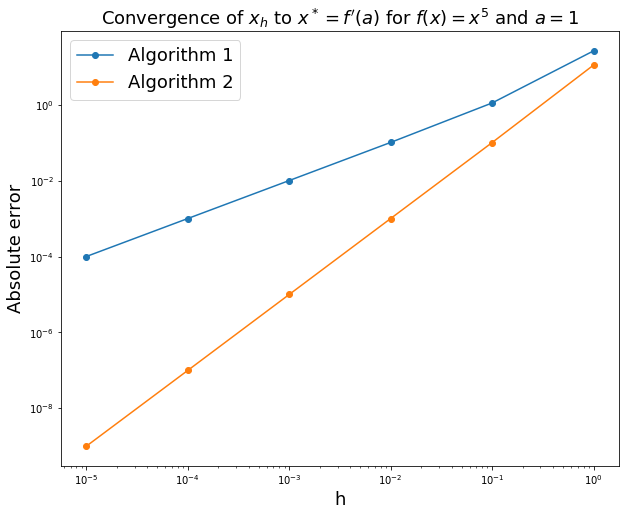

In [57]:
## behavior of the error for the two formulas computing a derivative

# point a
a = 1

#sequence of h = [1, 1e-1, 1e-2 ... 1e-5]
n = np.arange(6)
h = 10.**(-n)


# approximation of f'(a) using the first algorithm
# and the corresponding error
Der1 = ApproxDerivative1(f, a, h)
Err1 = abs(Der1 - 5.)

# approximation of f'(a) using the second algorithm
# and the corresponding error
Der2 = ApproxDerivative2(f, a, h)
Err2 = abs(Der2 - 5.)

# plot of the errors versus h
fig = plt.figure(figsize=(10, 8))
plt.loglog(h, Err1, marker="o", label="Algorithm 1")
plt.loglog(h, Err2, marker="o", label="Algorithm 2")
plt.legend(loc='upper left', fontsize=18)
plt.xlabel('h', fontsize=18)
plt.ylabel('Absolute error', fontsize=18)
plt.title('Convergence of $x_h$ to $x^*=f\'(a)$ for $f(x)=x^5$ and $a=1$', fontsize=18)

plt.show()


This figure confirms that both errors $e_h$ and $\bar e_h$ seem to converge to zero when $h$ goes to zero. The convergence is quicker for the second algorithm than for the first one. Indeed, for $\bar x_h$, precision $10^{-3}$ is obtained for $h\approx 10^{-2}$, while it requires a much smaller $h\approx 10^{-4}$ for $x_h$.

_**These numerical observations (convergence, speed of convergence...) have to be confirmed/proved by a theoretical study of the error. Typically, one tries to prove that the error is bounded by a quantity converging to zero. Such a bound, if explicit, is called an error estimator.**_

Here, a study of the remainder of the Taylor expansions of $f$ about point $a$ can be used in order to quantify the error and its dependency on $h$ for each algorithm.

Indeed, supposing $f\in \cal{C}^2(\mathbb{R})$, the Taylor-Lagrange formula (see appendix) yields

$$
\forall h\geq 0, \quad\exists \xi \in (a,a+h) \quad{}\text{ such that }\quad{} f(a+h) = f(a) + f'(a)\, h + \frac{f''(\xi)}{2}\,h^2.
$$

This gives, for $h\leq 1$

$$
e_h = \left|\, f'(a) - \frac{f(a+h)-f(a)}{h} \,\right| = \left| \frac{f''(\xi)}{2}\,h \right| \leq \frac{\sup_{[a,a+1]}{\left|f''\right|}}{2}\,h = M_1\, h
$$

where $M_1$ is a constant independent of $h$. From this, we prove the convergence of the first algorithm:

$$e_h = \left|\, f'(a)-x_h \,\right| \to 0 \quad{} \text{ when } \quad{} h\to 0.$$

To study the convergence of the second algorithm, we suppose $f\in \cal{C}^3(\mathbb{R})$ and use the Taylor-Lagrange formula at order $3$:

$$
\forall h\geq 0, \quad\exists \xi_+ \in (a,a+h) \quad\text{ such that }
$$

$$
\quad f(a+h) = f(a) + f'(a)\, h + \frac{f''(a)}{2} \, h^2 +  \frac{f'''(\xi_+)}{6}\,h^3,
$$

and 

$$
\forall h\geq 0, \quad\exists \xi_- \in (a-h,a) \quad\text{ such that }
$$

$$
\quad f(a-h) = f(a) - f'(a)\, h + \frac{f''(a)}{2} \, h^2 -  \frac{f'''(\xi_-)}{6}\,h^3.
$$


This gives, for $h\leq 1$

\begin{align}
\bar e_h &= \left|\, f'(a) - \frac{f(a+h)-f(a-h)}{2h} \,\right| \\
&= \left| \frac{f'''(\xi_+)+f'''(\xi_-)}{2\times 6}\,h^2 \right|  \\
& \leq \frac{\sup_{[a-1,a+1]}{\left|f'''\right|}}{6}\,h^2 \\
&= M_2\, h^2,
\end{align}

where $M_2$ is a constant independent of $h$. From this, we now have the convergence of the second algorithm:

$$\bar e_h = \left|\, f'(a)- \bar x_h \,\right|\to 0 \quad{} \text{ when } \quad{} h\to 0.$$

The estimations

$$
e_h \leq M_1 h \quad{} \text{and} \quad{} \bar e_h \leq M_2 h^2
$$

not only tell us that the error indeed goes to $0$ when $h$ goes to $0$ for both algorithms, but they also give more precise information about the behavior of the error when $h$ goes to zero. 

For example, we have proved that the bound behaves like $h$ for the first algorithm (we say that the error is of **order 1**) and  like $h^2$ for the second (we say that the error is of **order 2**).  The **speed of convergence** is quantified by the order of the error in $h$.  We recover here that algorithm 2 converges quicker to $f'(a)$ than algorithm 1. 

We will come back to these considerations about convergence and speed of convergence in more details in the first cycle.

<div markdown=1 class='Fur'>
If the constants $M_1$ and $M_2$ can be computed explicitly, these bounds can also be used to get quantitative information about the precision of the approximation obtained for a given value of $h$. For our example ($f(x)=x^5$ and $a=1$), we get $M_1=80$ and $M_2= 60$. Therefore, we know for instance that, for $h=0.01$ the error is at most equal to $M_1 h = 0.8$ for the first algorithm, and at most equal to $M_2 h^2 = 0.006$ for the second algorithm.

Conversely, **the explicit estimation of the error also allows to choose adequately the value of the discretization parameter needed to reach a given precision.** For example, suppose you want to approximate $x^*=f'(1)$ and to be precise up to $10^{-6}$. The previous estimation says that you can reach this precision with $h=10^{-6}/M_1=1.25\times 10^{-8}$ using the first algorithm and $h=\sqrt{10^{-6}/M_2}\approx 1.3\times 10^{-4}$ using the second one.

If we compare this results to the errors $\vert x_h-x^*\vert$ and $\vert \bar x_h-x^*\vert$ that we explicitly computed before, we see that we are slightly *overestimating* the errors. However, usually we do not know the solution $x^*$ explicitly (otherwise we would not try to use an algorithm to approximate it), and then having an estimation of the error is often the only information we can get.

<a id="total"></a>
## Total numerical error

When computing an approximation of the solution to a given problem, the total error is made of both the error due to the mathematical approximation of the problem (truncation error) and errors due to the use of finite-digit approximations in computers (round-off errors).

To illustrate this, let us consider again the first algorithm we proposed in the previous section to estimate the derivative $f'(a)$:

$$
x_h= \frac{f(a+h)-f(a)}{h}.
$$

When $h$ is very small, this formula involves a subtraction between the two nearly equal numbers $f(a+h)$ and $f(a)$, which can induce a significant round-off error. The magnitude of this error is then increased due to the division by the small number $h$.

The approximation of $f'(a)$ given by the computer is in fact

$$
\tilde x_h = rd\left(\,\,(\,\,rd(f(a+h))\ominus rd(f(a))\,\,)\,\,\oslash\,\, rd(h)\,\,\right)
$$

so that the error can be spilt in two terms:

\begin{align}
\tilde e_h &= \left|\, f'(a) - \tilde x_h \,\right| \\
&= \left|\, f'(a) - \frac{f(a+h)-f(a)}{h} + \frac{f(a+h)-f(a)}{h} - \tilde x_h\,\right| \\
&\leq \left|\, f'(a) - \frac{f(a+h)-f(a)}{h}\,\right| + \left|\,\frac{f(a+h)-f(a)}{h} - \tilde x_h \,\right|\\
& \quad\quad \text{Truncation error} \quad\quad+\quad\quad \text{Round-off error}
\end{align}

We already proved that the truncation error goes to zero when $h$ goes to zero. On the contrary, the round-off error increases for $h$ very small. As a consequence, for $h$ too small, the round-off error can become greater than the truncation error, which deteriorates the approximation. This can be observed for both of the previous algorithms by plotting the error versus $h$ for smaller values of $h$ than in the previous study:

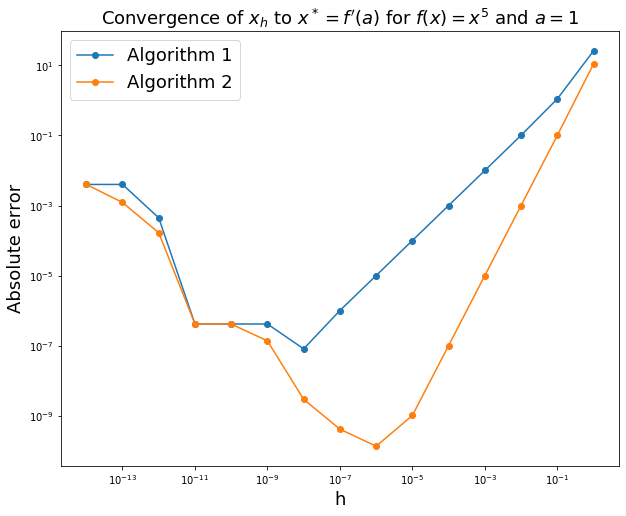

In [62]:
## behavior of the error (small h) for the two formulas computing a derivative

# point a
a = 1

#sequence of h = [1, 1e-1, 1e-2 ... 1e-14]
n = np.arange(15)
h = 10.**(-n)


# approximation of f'(a) using the first algorithm
# and the corresponding error
Der1 = ApproxDerivative1(f, a, h)
Err1 = abs(Der1 - 5.)

# approximation of f'(a) using the second algorithm
# and the corresponding error
Der2 = ApproxDerivative2(f, a, h)
Err2 = abs(Der2 - 5.)

# plot of the errors versus h
fig = plt.figure(figsize=(10, 8))
plt.loglog(h, Err1, marker="o", label="Algorithm 1")
plt.loglog(h, Err2, marker="o", label="Algorithm 2")
plt.legend(loc='upper left', fontsize=18)
plt.xlabel('h', fontsize=18)
plt.ylabel('Absolute error', fontsize=18)
plt.title('Convergence of $x_h$ to $x^*=f\'(a)$ for $f(x)=x^5$ and $a=1$', fontsize=18)

plt.show()


When $h$ is *not too small*, the error is dominated by the truncation error: we observe that, at first, the error seems to go toward zero. Then, below a given value of $h$, the round-off errors become dominant and the total error starts to increase again! One has to be aware of such behaviors to be able to choose efficiently the discretization parameters.

## Appendix

### Taylor's theorem

<table>
        <tr>
            <td><img src="figures/Brook_Taylor.jpg" alt="Taylor" style="width: 170px;" /></td>
            <td><img src="figures/Lagrange.jpg" alt="Lagrange" style="width: 150px;" /></td>
        </tr>
</table>

>**Brook Taylor (1685 – 1731) and Joseph-Louis Lagrange (1736 - 1813).**
>Brook Taylor is an English mathematician and was also musician and painter artist. He is best known for the so-called Taylor's theorem and Taylor series that can be found in its book *Methodus incrementorum directa et inversa* (without rest nor convergence result) . In this book, one can also found the integration by parts formula and the principles of finite differences. It remained quite unknown until the Italian mathematician and astronomer Joseph-Louis Lagrange discovered its importance in 1772, to the point of considering Taylor's work to be the *foundation of differential calculus*. 

We recall below one version of Taylor's theorem, which describes the Taylor-Lagrange formula (see also MAA102):

<div  markdown=1 class="Thm">

**Taylor's Theorem**

Suppose $f\in C^n([a,b])$, $f^{(n+1)}$ exists on $[a,b]$ and $x_0\in [a,b]$. For every $x\in [a,b]$, there exists $\xi(x)$ between $x_0$ and $x$ with 

$$
f(x) = P_n(x) + R_n(x),
$$

where 

\begin{align}
P_n(x) &= f(x_0) + f'(x_0) (x-x_0) + \frac{f''(x_0)}{2!} (x-x_0)^2 + \ldots +  \frac{f^{(n)}(x_0)}{n!} (x-x_0)^n\\
&=\sum_{k=0}^n \frac{f^{(k)}(x_0)}{k!} (x-x_0)^k,
\end{align}

and

$$
R_n(x) = \frac{f^{(n+1)}(\xi(x))}{(n+1)!} (x-x_0)^{n+1}.
$$

$P_n$ is called the **$n$-th Taylor polynomial** of $f$ around $x_0$ and $R_n$ is called the **remainder term** associated with $P_n$. 

In [7]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom3.css").read()
    return HTML(styles)
css_styling()